In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# New Section

In [ ]:
df = pd.read_csv('breast_cancer_diagnosis.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Applying Label Encoder for diagnosis column



In [ ]:
encoder=preprocessing.LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Calculating Correlations Between Features and Output

In [ ]:
for i in df.columns:
    print(i," = ",df[i].corr(df['diagnosis']))

id  =  0.03976850962171697
diagnosis  =  1.0
radius_mean  =  0.7300285113754558
texture_mean  =  0.4151852998452037
perimeter_mean  =  0.742635529725832
area_mean  =  0.7089838365853891
smoothness_mean  =  0.3585599650859316
compactness_mean  =  0.5965336775082525
concavity_mean  =  0.6963597071719048
concave points_mean  =  0.7766138400204349
symmetry_mean  =  0.33049855426254654
fractal_dimension_mean  =  -0.012837602698432366
radius_se  =  0.5671338208247165
texture_se  =  -0.008303332973877427
perimeter_se  =  0.5561407034314825
area_se  =  0.5482359402780237
smoothness_se  =  -0.06701601057948728
compactness_se  =  0.29299924424885804
concavity_se  =  0.25372976598083014
concave points_se  =  0.40804233271650414
symmetry_se  =  -0.0065217558706479615
fractal_dimension_se  =  0.07797241739025601
radius_worst  =  0.7764537785950386
texture_worst  =  0.45690282139679755
perimeter_worst  =  0.7829141371737584
area_worst  =  0.7338250349210504
smoothness_worst  =  0.421464861066402
com

Dropping Unimportant Attributes

In [ ]:
df.drop(['id','fractal_dimension_mean','texture_se','symmetry_se','smoothness_se'],axis=1,inplace=True)
#df.drop(['id'],axis=1,inplace=True)

Correlation Matrix between Atrributes

<Axes: >

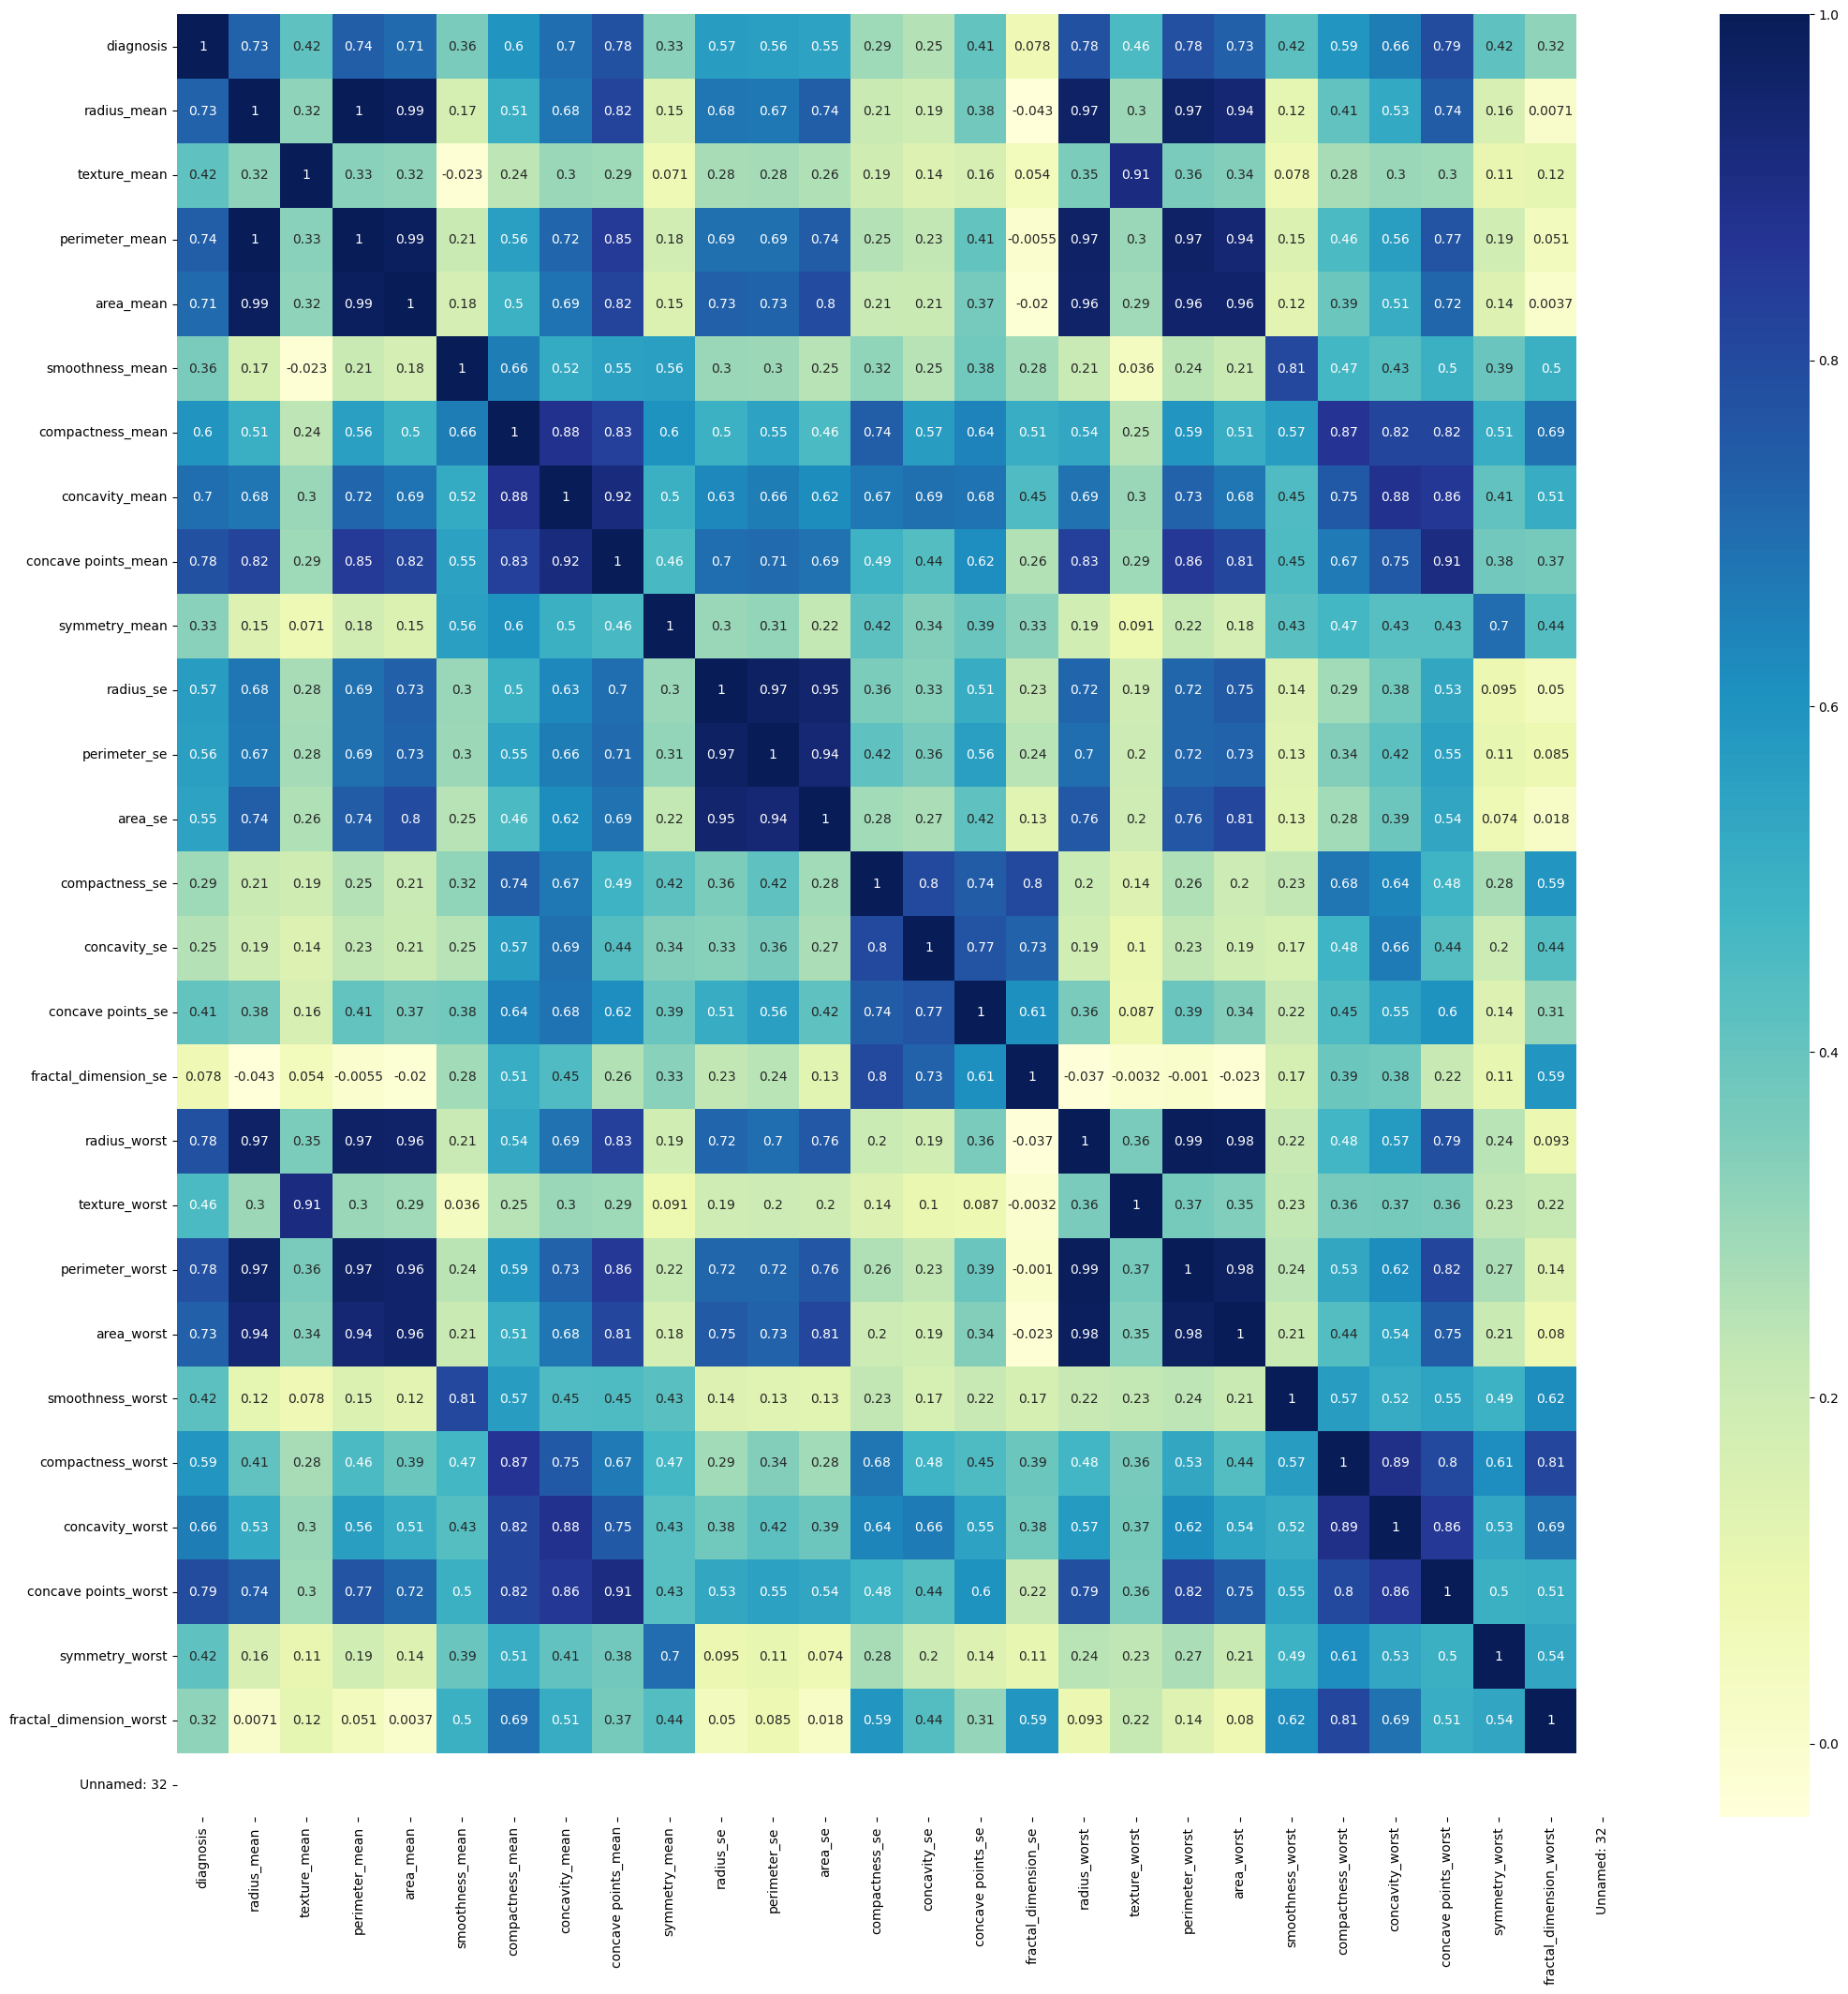

In [ ]:
plt.figure(figsize=(25,25))
sb.heatmap(df.corr(), annot=True,cmap='YlGnBu')

Splitting Features and Output by iloc function

In [ ]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Standarization Done to Make mean = 0 and SD = 1

Then Split available data into train and test

In [ ]:
col=X.columns
object = StandardScaler()
X = object.fit_transform(X)
X=pd.DataFrame(X,columns=col)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Fill Nan values in dataset with the column mean

In [ ]:
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)

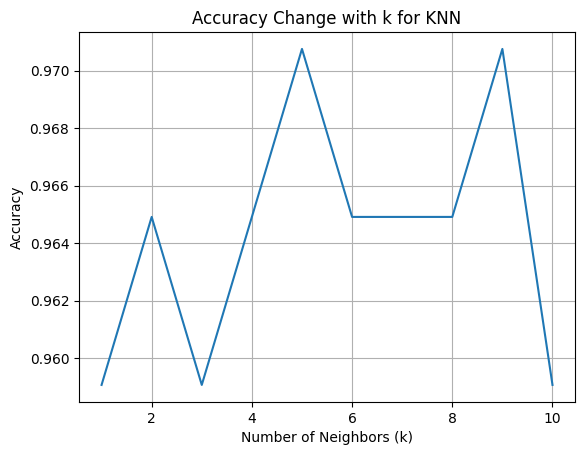

In [ ]:

# Define hyperparameters and evaluation metric
hyperparameter_grid = {'n_neighbors': range(1, 11)}  # Explore k from 1 to 10
evaluation_metric = 'accuracy'
# Create an empty list to store evaluation metrics (accuracy for each k)
k_values = []
accuracy_scores = []

# Loop through k values in hyperparameter grid
for k in hyperparameter_grid['n_neighbors']:
    # Create a KNN model with current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(x_train, y_train)

    # Make predictions on testing set
    y_pred = knn.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append k and accuracy to respective lists
    k_values.append(k)
    accuracy_scores.append(accuracy)

# Create the line chart
plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy Change with k for KNN')
plt.grid(True)
plt.show()

KNN Classifier Training

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(x_train,y_train)

KNN Classifier Testing

In [ ]:
y_pred =knn.predict(x_test)
knn.score(x_train, y_train)

0.9723618090452262

Calculating Accuracy between Predicted Labels and Actual Labels

In [ ]:
print(accuracy_score( y_test, y_pred))

0.9707602339181286


Output Sample

In [ ]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Confusion Matrix to get True Positives, True Negatives, False Positives and False Negatives

<Axes: >

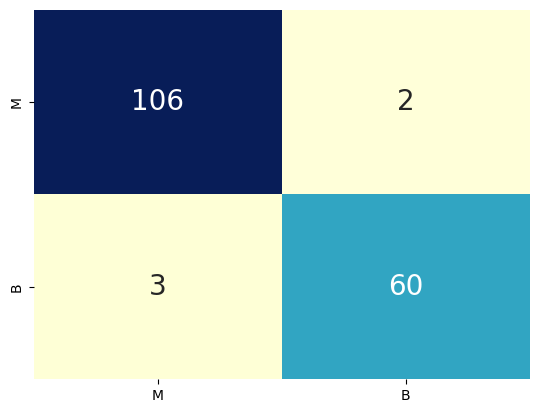

In [ ]:
cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['M', 'B']
cr.index=['M', 'B']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

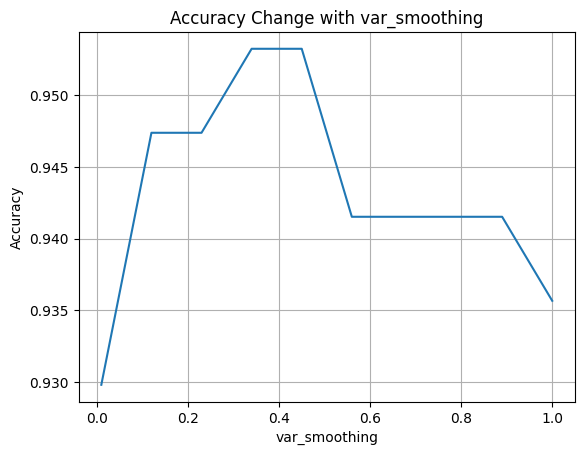

In [ ]:


# Define a range of var_smoothing values to explore
var_smoothing_values = np.linspace(0.01, 1.0, num=10)  # Adjust the range as needed

# Create an empty list to store accuracy values
accuracy_scores = []

# Iterate through var_smoothing values
for smoothing in var_smoothing_values:
    # Create a Gaussian Naive Bayes model with current smoothing parameter
    model = GaussianNB(var_smoothing=smoothing)

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on testing set
    y_pred = model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    accuracy_scores.append(accuracy)

# Create the line chart
plt.plot(var_smoothing_values, accuracy_scores)
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.title('Accuracy Change with var_smoothing')
plt.grid(True)
plt.show()


Naive Bayesian Classifier Training

In [ ]:
model = GaussianNB(var_smoothing=0.4)
model.fit(x_train, y_train)

GaussianNB(var_smoothing=0.4)

In [ ]:
y_pred = model.predict(x_test)
model.score(x_train,y_train)

0.9371859296482412

Accuracy Between Predicted Labels and Actual Labels

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9532163742690059


Output Sample

In [ ]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Confusion Matrix to get True Positives, True Negatives, False Positives and False Negatives

<Axes: >

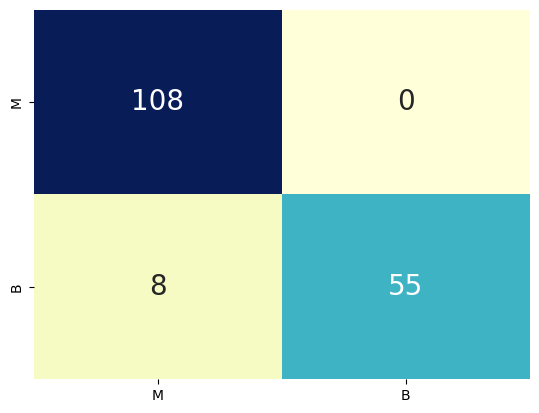

In [ ]:
cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['M', 'B']
cr.index=['M', 'B']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

MLP Classifier

In [ ]:
activation_functions = ['identity', 'logistic', 'tanh']
accuracy_scores_identity = []
accuracy_scores_logistic = []
accuracy_scores_tanh = []

activation_functions = ['identity', 'logistic', 'tanh']

for k in activation_functions:
    for i in range(1, 100, 3):
        for l in np.arange(0.1, 1, 0.1):
            model = MLPClassifier(hidden_layer_sizes=i,
                                  activation=k,
                                  solver='sgd',  # Use SGD
                                  learning_rate='constant',
                                  learning_rate_init=l,
                                  max_iter=200)
            model.fit(x_train, y_train)

            # Make predictions on testing set
            y_pred = model.predict(x_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Append accuracy to the corresponding list based on activation function
            if k == 'identity':
                accuracy_scores_identity.append((accuracy, i, l))
            elif k == 'logistic':
                accuracy_scores_logistic.append((accuracy, i, l))
            elif k == 'tanh':
                accuracy_scores_tanh.append((accuracy, i, l))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

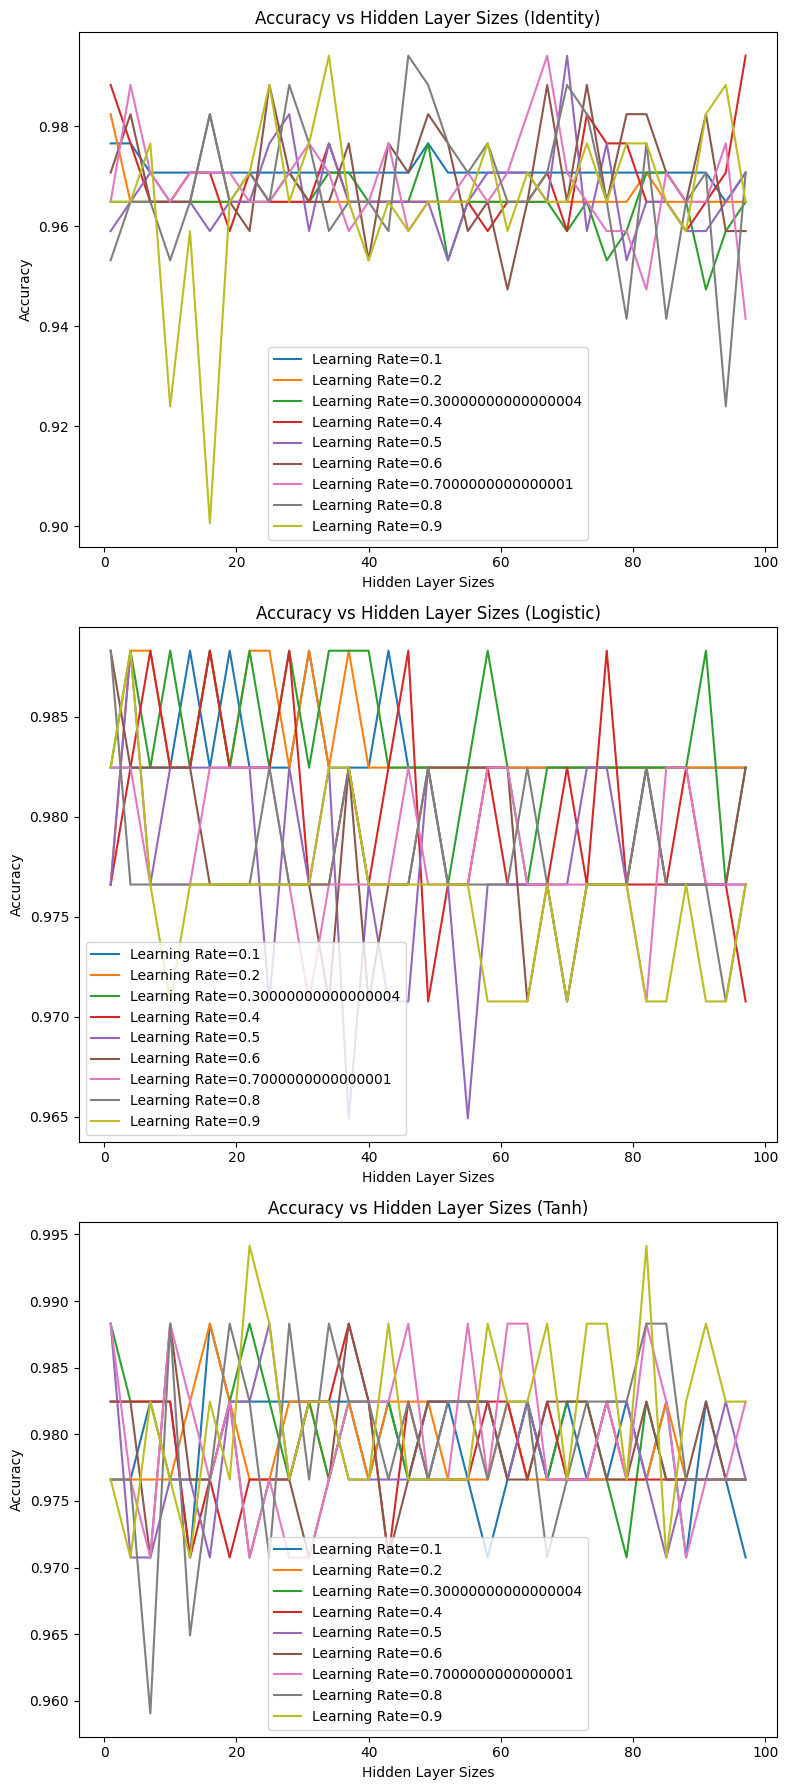

In [ ]:
plt.figure(figsize=(8, 18))

# Plot for identity activation function
plt.subplot(3, 1, 1)
for l in np.arange(0.1, 1, 0.1):
    accuracies = [acc[0] for acc in accuracy_scores_identity if acc[2] == l]
    hidden_sizes = [acc[1] for acc in accuracy_scores_identity if acc[2] == l]
    plt.plot(hidden_sizes, accuracies, label=f'Learning Rate={l}')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Hidden Layer Sizes (Identity)')
plt.legend()

# Plot for logistic activation function
plt.subplot(3, 1, 2)
for l in np.arange(0.1, 1, 0.1):
    accuracies = [acc[0] for acc in accuracy_scores_logistic if acc[2] == l]
    hidden_sizes = [acc[1] for acc in accuracy_scores_logistic if acc[2] == l]
    plt.plot(hidden_sizes, accuracies, label=f'Learning Rate={l}')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Hidden Layer Sizes (Logistic)')
plt.legend()

# Plot for tanh activation function
plt.subplot(3, 1, 3)
for l in np.arange(0.1, 1, 0.1):
    accuracies = [acc[0] for acc in accuracy_scores_tanh if acc[2] == l]
    hidden_sizes = [acc[1] for acc in accuracy_scores_tanh if acc[2] == l]
    plt.plot(hidden_sizes, accuracies, label=f'Learning Rate={l}')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Hidden Layer Sizes (Tanh)')
plt.legend()

plt.tight_layout()
plt.show()

(0.9941520467836257, 82, 0.9)
(0.9941520467836257, 97, 0.4)
(0.9883040935672515, 91, 0.30000000000000004)


<Axes: >

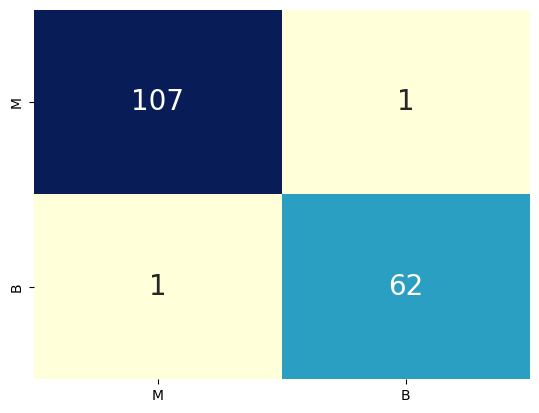

In [ ]:
print (max(accuracy_scores_tanh))
print (max(accuracy_scores_identity))
print (max(accuracy_scores_logistic))
model = MLPClassifier(hidden_layer_sizes=max(accuracy_scores_tanh)[1],
                                  activation='tanh',
                                  solver='sgd',  # Use SGD
                                  learning_rate='constant',
                                  learning_rate_init=max(accuracy_scores_tanh)[2],
                                  max_iter=200)
model.fit(x_train, y_train)

            # Make predictions on testing set
y_pred = model.predict(x_test)

cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['M', 'B']
cr.index=['M', 'B']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: >

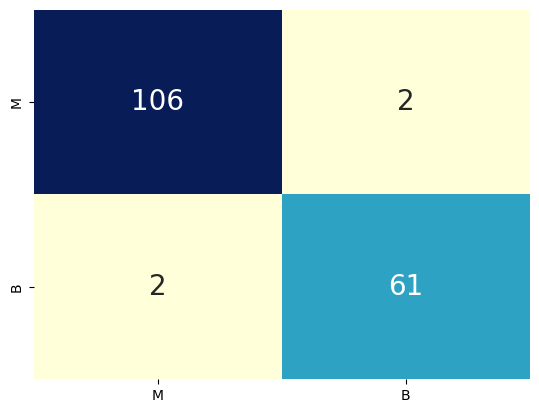

In [ ]:
model = MLPClassifier(hidden_layer_sizes=max(accuracy_scores_logistic)[1],
                                  activation='logistic',
                                  solver='sgd',  # Use SGD
                                  learning_rate='constant',
                                  learning_rate_init=max(accuracy_scores_logistic)[2],
                                  max_iter=200)
model.fit(x_train, y_train)

            # Make predictions on testing set
y_pred = model.predict(x_test)

cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['M', 'B']
cr.index=['M', 'B']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

<Axes: >

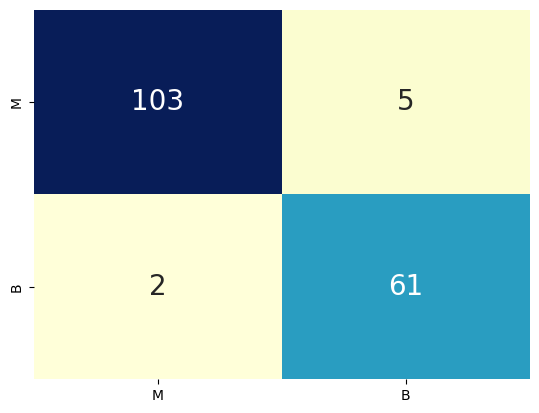

In [ ]:
model = MLPClassifier(hidden_layer_sizes=max(accuracy_scores_identity)[1],
                                  activation='identity',
                                  solver='sgd',  # Use SGD
                                  learning_rate='constant',
                                  learning_rate_init=max(accuracy_scores_identity)[2],
                                  max_iter=200)
model.fit(x_train, y_train)

            # Make predictions on testing set
y_pred = model.predict(x_test)

cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['M', 'B']
cr.index=['M', 'B']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

In [ ]:
accuracy_values=[]
max_dept_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for max_dept in max_dept_values:
    # Creating a decision tree classifier with specified max_depth
    clf = DecisionTreeClassifier(max_depth=max_dept,criterion='entropy')

    # Training the classifier on the training set
    clf.fit(x_train, y_train)

    # Making predictions on the testing set
    y_pred = clf.predict(x_test)

    # Calculating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

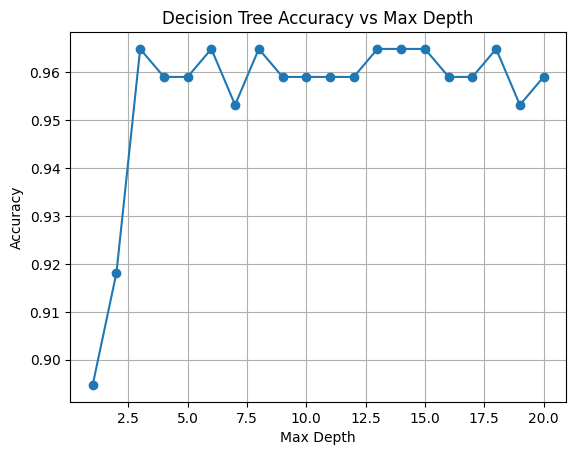

<Axes: >

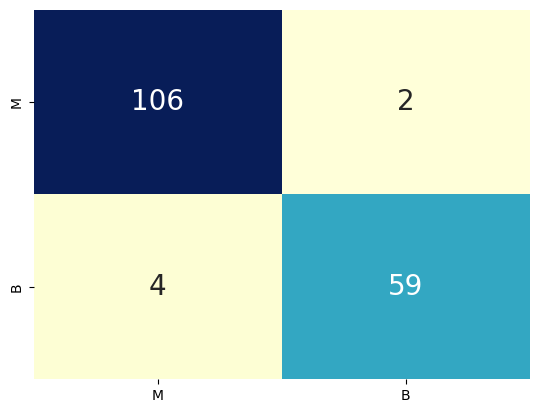

In [ ]:
plt.plot(max_dept_values, accuracy_values, marker='o')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
clf = DecisionTreeClassifier(max_depth=accuracy_values.index(max(accuracy_values))+1,criterion='entropy')

    # Training the classifier on the training set
clf.fit(x_train, y_train)

# Making predictions on the testing set
y_pred = clf.predict(x_test)
cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['M', 'B']
cr.index=['M', 'B']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

In [ ]:
c_list=[]
c_list.append(0.1)
accuracy_values=[]
svm_model = SVC(C=0.1)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_values.append(accuracy)
for c in np.arange(0.5,1000,0.5):
  svm_model = SVC(C=c)
  svm_model.fit(x_train, y_train)
  y_pred = svm_model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_values.append(accuracy)
  c_list.append(c)

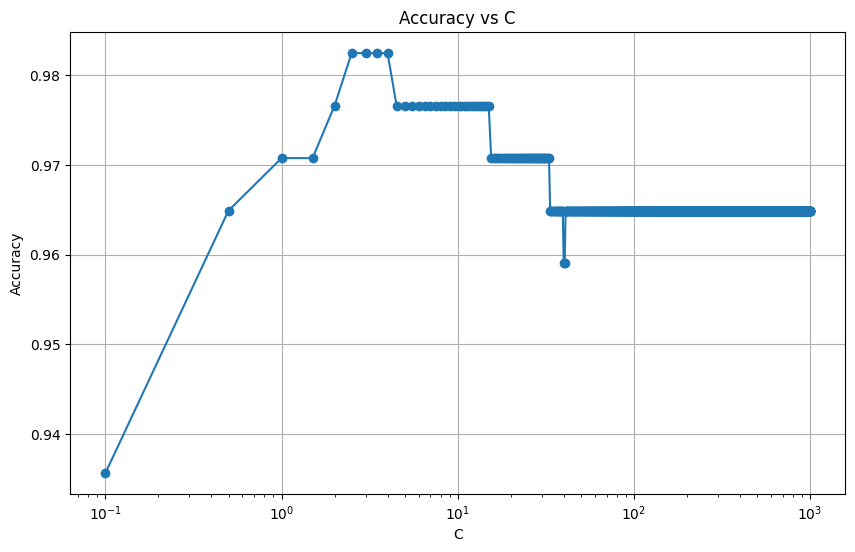

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(c_list, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')  # Using a logarithmic scale for better visualization
plt.grid(True)
plt.show()

In [ ]:
best_c=accuracy_values.index(max(accuracy_values))/2
if (best_c == 0):
  best_c = 0.1
best_c

In [ ]:
svm_model = SVC(C=best_c)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['M', 'B']
cr.index=['M', 'B']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')